<p><center style="color:#F1A424; font-family: 'Dancing Script', cursive; font-size:25px;">Thanks for visiting my notebook </center></p>

<div style="background-color:#fff2db; padding: 10px;">
<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;">  Feel free to customize or fork the notebook to suit your needs. If you find it helpful, please consider giving it an upvote ⬆️ — it helps others discover the notebook too! Your support motivates me to create more content like this</div>

<center><img src='https://cdn-images-1.medium.com/max/1200/1*23eYZjoA_GnwcGRrqXYxgg.gif' 
     height=50px width=350px /></center>

<a id="toc"></a>

<center><img src='https://cfml.se/img/blog/sentiment_classification/top_img.png' 
     height=100px width=700px /></center>     

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">  The notebook is for Sentiment Analysis of moview reviews data from NLTK library.  </p><br> 

In [1]:
#Import and read data

import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [2]:
#Checking the files
fileids = movie_reviews.fileids()
print(fileids[:10])

['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [3]:
#Let's check the length of the data
len(movie_reviews.fileids())


2000

In [4]:
#Printing the raw content for 3rd file
movie_reviews.raw(movie_reviews.fileids()[1])


'the happy bastard\'s quick movie review \ndamn that y2k bug . \nit\'s got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . \nlittle do they know the power within . . . \ngoing for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for all flash and no substance . \nwe don\'t know why the crew was really out in the middle of nowhere , we don\'t know the origin of what took over the ship ( just that a big pink flashy thing hit the mir ) , and , of course , we don\'t know why donald sutherland is stumbling around drunkenly throughout . \nhere , it\'s just " hey , let\'s chase these people around with some robots " . \nthe acting is below average , even from the likes of curtis . \nyou\'re more likely to get a kick out of h

In [5]:
#Printing the words as list
movie_reviews.words(movie_reviews.fileids()[2])


['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...]

In [6]:
#Frequency distribution of the words
nltk.FreqDist(movie_reviews.words())


FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [7]:
#Most commonly used words
nltk.FreqDist(movie_reviews.words()).most_common(10)


[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

In [8]:
#Importing required libraries from nltk
nltk.download('stopwords')
nltk.download('punkt') 


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#Assigning all words in a  variable
all_words=[]  
def lower(x):
    for w in x.words():
        words=w.lower() #For converting all words to lower
        all_words.append(words)
        
lower(movie_reviews) 
all_words[:20] #checking samples 

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.',
 'they',
 'get',
 'into',
 'an']

In [10]:
#Let's list out the stopwords first & Punctuations
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)  

In [11]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#User defind function to remove stopwords
all_words_clean=[]
def clean(x):
    for word in x:
        if word not in stopwords: 
            all_words_clean.append(word)
            
clean(all_words)
all_words_clean[:20] #checking samples 

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 'deal']

In [13]:
#Let's check the word frequency again
all_words_freq=nltk.FreqDist(all_words_clean)
all_words_freq

FreqDist({'film': 9517, 'one': 5852, 'movie': 5771, 'like': 3690, 'even': 2565, 'good': 2411, 'time': 2411, 'story': 2169, 'would': 2109, 'much': 2049, ...})

In [14]:
#Function to extract common words from frequency 
word_features=[]
def common_features(x):
    for item in x.most_common(2000):
        word_features.append(item[0])

common_features(all_words_freq)
word_features[:20] #checking samples 

['film',
 'one',
 'movie',
 'like',
 'even',
 'good',
 'time',
 'story',
 'would',
 'much',
 'character',
 'also',
 'get',
 'two',
 'well',
 'characters',
 'first',
 '--',
 'see',
 'way']

In [15]:
#Let's check first 10 instances
word_features[0:10]

['film',
 'one',
 'movie',
 'like',
 'even',
 'good',
 'time',
 'story',
 'would',
 'much']

In [16]:
#Let's check the categories of these reviews
movie_reviews.categories()

['neg', 'pos']

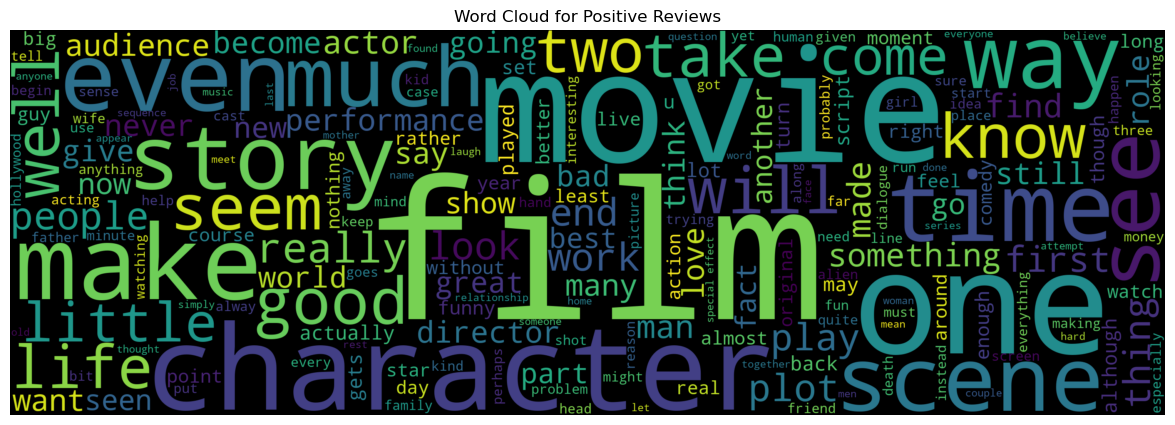

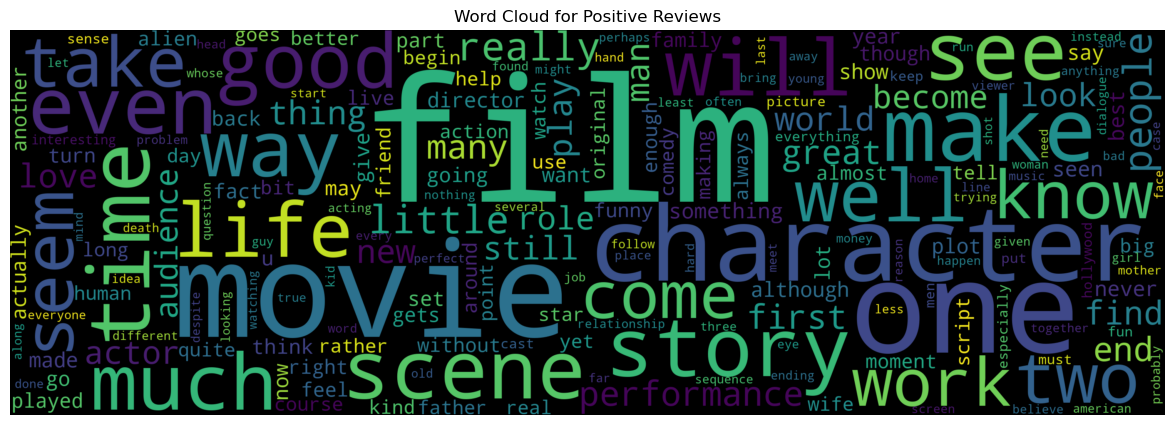

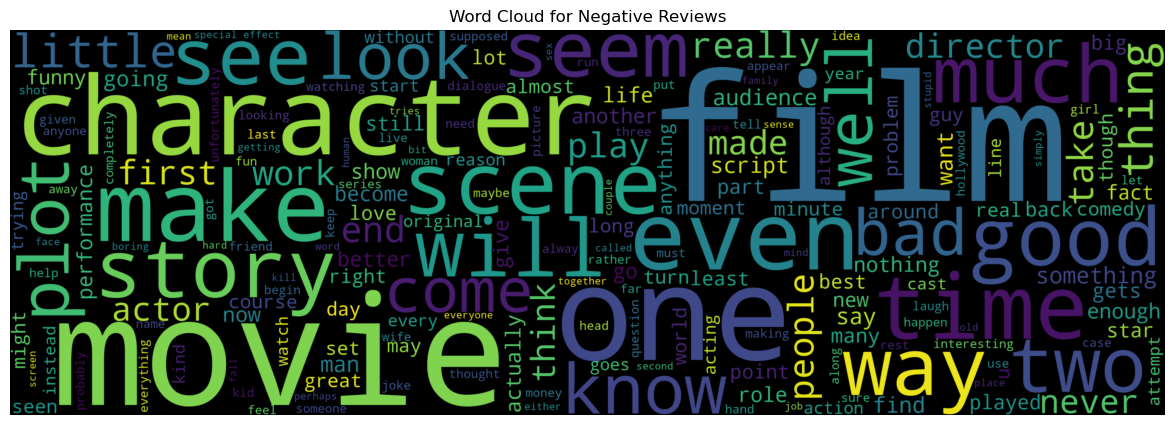

In [17]:
# Define a function to create word cloud
reviews_data = movie_reviews.fileids()
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=3000, height=1000, background_color='black').generate(text)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

positive_fileids = movie_reviews.fileids(categories='pos')
negative_fileids = movie_reviews.fileids(categories='neg')

create_wordcloud(' '.join([movie_reviews.raw(fileid) for fileid in reviews_data]), 'Word Cloud for Positive Reviews')
create_wordcloud(' '.join([movie_reviews.raw(fileid) for fileid in positive_fileids]), 'Word Cloud for Positive Reviews')
create_wordcloud(' '.join([movie_reviews.raw(fileid) for fileid in negative_fileids]), 'Word Cloud for Negative Reviews')

In [18]:

documents=[]
def docs(x):
    for category in x.categories():
        for fileid in x.fileids(category):
            documents.append((x.words(fileid),category))
docs(movie_reviews)

In [19]:
#randomizing data
import random
random.shuffle(documents)

In [20]:
documents[:20] #checking samples 

[(['around', 'the', 'end', 'of', '1998', ',', 'a', ...], 'neg'),
 (['being', 'the', 'self', '-', 'proclaimed', ...], 'pos'),
 (['i', 'cried', 'during', '_babe_', '.', 'i', 'admit', ...], 'neg'),
 (['it', "'", 's', 'wednesday', ',', 'march', '27', ',', ...], 'pos'),
 (['more', 'than', 'forty', 'years', 'ago', ',', 'the', ...], 'pos'),
 (['andrew', 'lloyd', 'webber', "'", 's', 'musicals', ...], 'pos'),
 (['here', "'", 's', 'a', 'rarity', ':', 'a', 'children', ...], 'neg'),
 (['this', 'talky', ',', 'terribly', '-', 'plotted', ...], 'neg'),
 (['the', 'premise', 'is', 'simple', ',', 'if', 'not', ...], 'pos'),
 (['synopsis', ':', 'a', 'maniac', ',', 'crazed', 'by', ...], 'neg'),
 (['there', "'", 's', 'a', 'scene', 'somewhere', 'in', ...], 'neg'),
 (['if', 'anything', ',', '"', 'stigmata', '"', 'should', ...], 'neg'),
 (['steven', 'spielberg', 'is', 'now', 'considered', ...], 'pos'),
 (['at', 'first', 'i', 'was', 'intrigued', 'by', 'the', ...], 'neg'),
 (['senseless', '(', 'r', ')', 'marlon',

In [21]:
documents[0][0][0:20]

['around',
 'the',
 'end',
 'of',
 '1998',
 ',',
 'a',
 'japanese',
 'cartoon',
 'came',
 'to',
 'the',
 'usa',
 'television',
 ',',
 'and',
 'really',
 'wasn',
 "'",
 't']

In [22]:

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [23]:
featuresets=[]                   
def processed(x):
    for (d,c) in x:
        featuresets.append((document_features(d),c))
        
processed(documents)

In [24]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [25]:
print(nltk.classify.accuracy(classifier,test_set))

0.81


In [26]:
classifier.show_most_informative_features(20)

Most Informative Features
        contains(seagal) = True              neg : pos    =     13.9 : 1.0
   contains(outstanding) = True              pos : neg    =     10.8 : 1.0
         contains(damon) = True              pos : neg    =      8.0 : 1.0
         contains(mulan) = True              pos : neg    =      7.5 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.4 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
         contains(flynt) = True              pos : neg    =      5.6 : 1.0
         contains(awful) = True              neg : pos    =      5.5 : 1.0
        contains(wasted) = True              neg : pos    =      5.5 : 1.0
        contains(poorly) = True              neg : pos    =      5.4 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.3 : 1.0
         contains(waste) = True              neg : pos    =      5.2 : 1.0
          contains(jedi) = True              pos : neg    =      5.2 : 1.0

<p><b><span style="color:#F1A424; font-family: 'verdana'; font-size:20px;">Inferences </span></b></p>
 
<ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
- Movies that are described as "outstanding" are more likely to be positively reviewed.<br>
- Movies that that are described as "poorly" are more likely to be negatively reviewed.<br>
- Other words that are indicative of positive sentiment include "mulan", "wonderfully", and "flynt".<br>
- Other words that are indicative of negative sentiment include "wasted", "awful", "lame", and "ridiculous".<br><br>

To conclude, the words that are most indicative of positive sentiment are those that express praise or admiration, while the words that are most indicative of negative sentiment are those that express criticism or disapproval. 
    </div>

<a id="toc"></a>

<a href="#toc" style="background-color: #F1A424 ; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>

---

<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#27537d;">
    <em>If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook. Happy Learning!</em>
</p>


<center><img src='https://y.yarn.co/acf1f16a-5604-4ef6-b6a2-399048e4878e_text.gif' width=500px height=10px  /></center>
     
